In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable

from pandas import set_option
set_option("display.max_rows", 10)
pd.options.mode.chained_assignment = None

filename = 'BD6FPdatatraining.csv'
training_data = pd.read_csv(filename)
training_data

# 1=DB  2=SS   3=SW
# 4=A 5=I 7=B
flowpatterns_colors = ['#F4D03F', '#F5B041','#DC7633','#6E2C00','#1B4F72','#2E86C1']

flowpatterns_labels = ['DB', 'SS', 'SW', 'A', 'I', 'B']

correct_FlowPattern_labels = training_data['FlowPattern'].values

In [2]:
training_data

,Samples,FlowPattern,Vsl,Vsg,VisL,VisG,DenL,DenG,ST,Ang,ID,FPLabels
0,1,3,0.40429,0.01677,0.001,0.00002,1000,1.8,0.07,-70.0,0.025,SW
1,2,3,0.63000,4.00000,0.001,0.00002,1000,1.8,0.07,-5.0,0.051,SW
2,3,5,4.00000,0.63000,0.001,0.00002,1000,1.8,0.07,5.0,0.051,I
3,4,4,0.41059,10.31910,0.001,0.00002,1000,1.8,0.07,-80.0,0.025,A
4,5,5,0.00250,2.50000,0.001,0.00002,1000,1.8,0.07,5.0,0.051,I
...,...,...,...,...,...,...,...,...,...,...,...,...
4535,4536,5,0.10000,1.00000,0.001,0.00002,1000,1.8,0.07,5.0,0.025,I
4536,4537,5,0.68984,0.02148,0.001,0.00002,1000,1.8,0.07,-90.0,0.025,I
4537,4538,4,0.00991,38.49360,0.001,0.00002,1000,1.8,0.07,50.0,0.025,A
4538,4539,5,0.09809,0.03961,0.001,0.00002,1000,1.8,0.07,70.0,0.025,I


In [3]:
def make_flowpatterns_log_plot(logs, flowpatterns_colors):
    #make sure logs are sorted by samples
    logs = logs.sort_values(by='Samples')
    cmap_flowpatterns = colors.ListedColormap(
            flowpatterns_colors[0:len(flowpatterns_colors)], 'indexed')
        
    ztop=logs.Samples.min(); zbot=logs.Samples.max()
                                              
    cluster=np.repeat(np.expand_dims(logs['FlowPattern'].values,1), 100, 1)
                                              
    f, ax = plt.subplots(nrows=1, ncols=10, figsize=(20, 30))
    ax[0].plot(logs.Vsl, logs.Samples, '-', color='blue')
    ax[1].plot(logs.Vsg, logs.Samples, '-', color='green')
    ax[2].plot(logs.VisL, logs.Samples, '-', color='red')
    ax[3].plot(logs.VisG, logs.Samples, '-', color='cyan')
    ax[4].plot(logs.DenL, logs.Samples, '-', color='black')
    ax[5].plot(logs.DenG, logs.Samples, '-', color='magenta')
    ax[6].plot(logs.ST, logs.Samples, '-', color='yellow')
    ax[7].plot(logs.Ang, logs.Samples, '-', color='purple')
    ax[8].plot(logs.ID, logs.Samples, '-', color='violet')
    im=ax[9].imshow(cluster, interpolation='none', aspect='auto',
                    cmap=cmap_flowpatterns,vmin=1,vmax=7)
                                              
    divider = make_axes_locatable(ax[9])
    cax = divider.append_axes("right", size="15%", pad=0.05)
    cbar=plt.colorbar(im, cax=cax)
    cbar.set_label((80*' ').join([' DB ', 'SS', 'SW',
                                'A', ' I ', ' B ']))
    cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')
                                              
    for i in range(len(ax)-1):
        ax[i].set_ylim(ztop,zbot)
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis='x', nbins=1)
                                                          
    ax[0].set_xlabel("Vsl")
    ax[0].set_xlim(logs.Vsl.min(),logs.Vsl.max())
    ax[1].set_xlabel("Vsg")
    ax[1].set_xlim(logs.Vsg.min(),logs.Vsg.max())
    ax[2].set_xlabel("VisL")
    ax[2].set_xlim(logs.VisL.min(),logs.VisL.max())
    ax[3].set_xlabel("VisG")
    ax[3].set_xlim(logs.VisG.min(),logs.VisG.max())
    ax[4].set_xlabel("DenL")
    ax[4].set_xlim(logs.DenL.min(),logs.DenL.max())
    ax[5].set_xlabel("DenG")
    ax[5].set_xlim(logs.DenG.min(),logs.DenG.max())
    ax[6].set_xlabel("ST")
    ax[6].set_xlim(logs.ST.min(),logs.ST.max())
    ax[7].set_xlabel("Ang")
    ax[7].set_xlim(logs.Ang.min(),logs.Ang.max())
    ax[8].set_xlabel("ID")
    ax[8].set_xlim(logs.ID.min(),logs.ID.max())
    ax[9].set_xlabel('FPLabels')
    
    ax[1].set_yticklabels([]); ax[2].set_yticklabels([]); ax[3].set_yticklabels([])
    ax[4].set_yticklabels([]); ax[5].set_yticklabels([]); ax[6].set_yticklabels([])
    ax[7].set_yticklabels([]); ax[8].set_yticklabels([]); ax[9].set_yticklabels([])
    ax[9].set_xticklabels([])

/var/folders/5_/5j22rwyx5cv_vxffrftbgnzh0000gn/T/ipykernel_1523/147862031.py:42: UserWarning: Attempting to set identical left == right == 0.001 results in singular transformations; automatically expanding.
  ax[2].set_xlim(logs.VisL.min(),logs.VisL.max())
/var/folders/5_/5j22rwyx5cv_vxffrftbgnzh0000gn/T/ipykernel_1523/147862031.py:44: UserWarning: Attempting to set identical left == right == 2e-05 results in singular transformations; automatically expanding.
  ax[3].set_xlim(logs.VisG.min(),logs.VisG.max())
/var/folders/5_/5j22rwyx5cv_vxffrftbgnzh0000gn/T/ipykernel_1523/147862031.py:46: UserWarning: Attempting to set identical left == right == 1000 results in singular transformations; automatically expanding.
  ax[4].set_xlim(logs.DenL.min(),logs.DenL.max())
/var/folders/5_/5j22rwyx5cv_vxffrftbgnzh0000gn/T/ipykernel_1523/147862031.py:48: UserWarning: Attempting to set identical left == right == 1.8 results in singular transformations; automatically expanding.
  ax[5].set_xlim(logs.Den

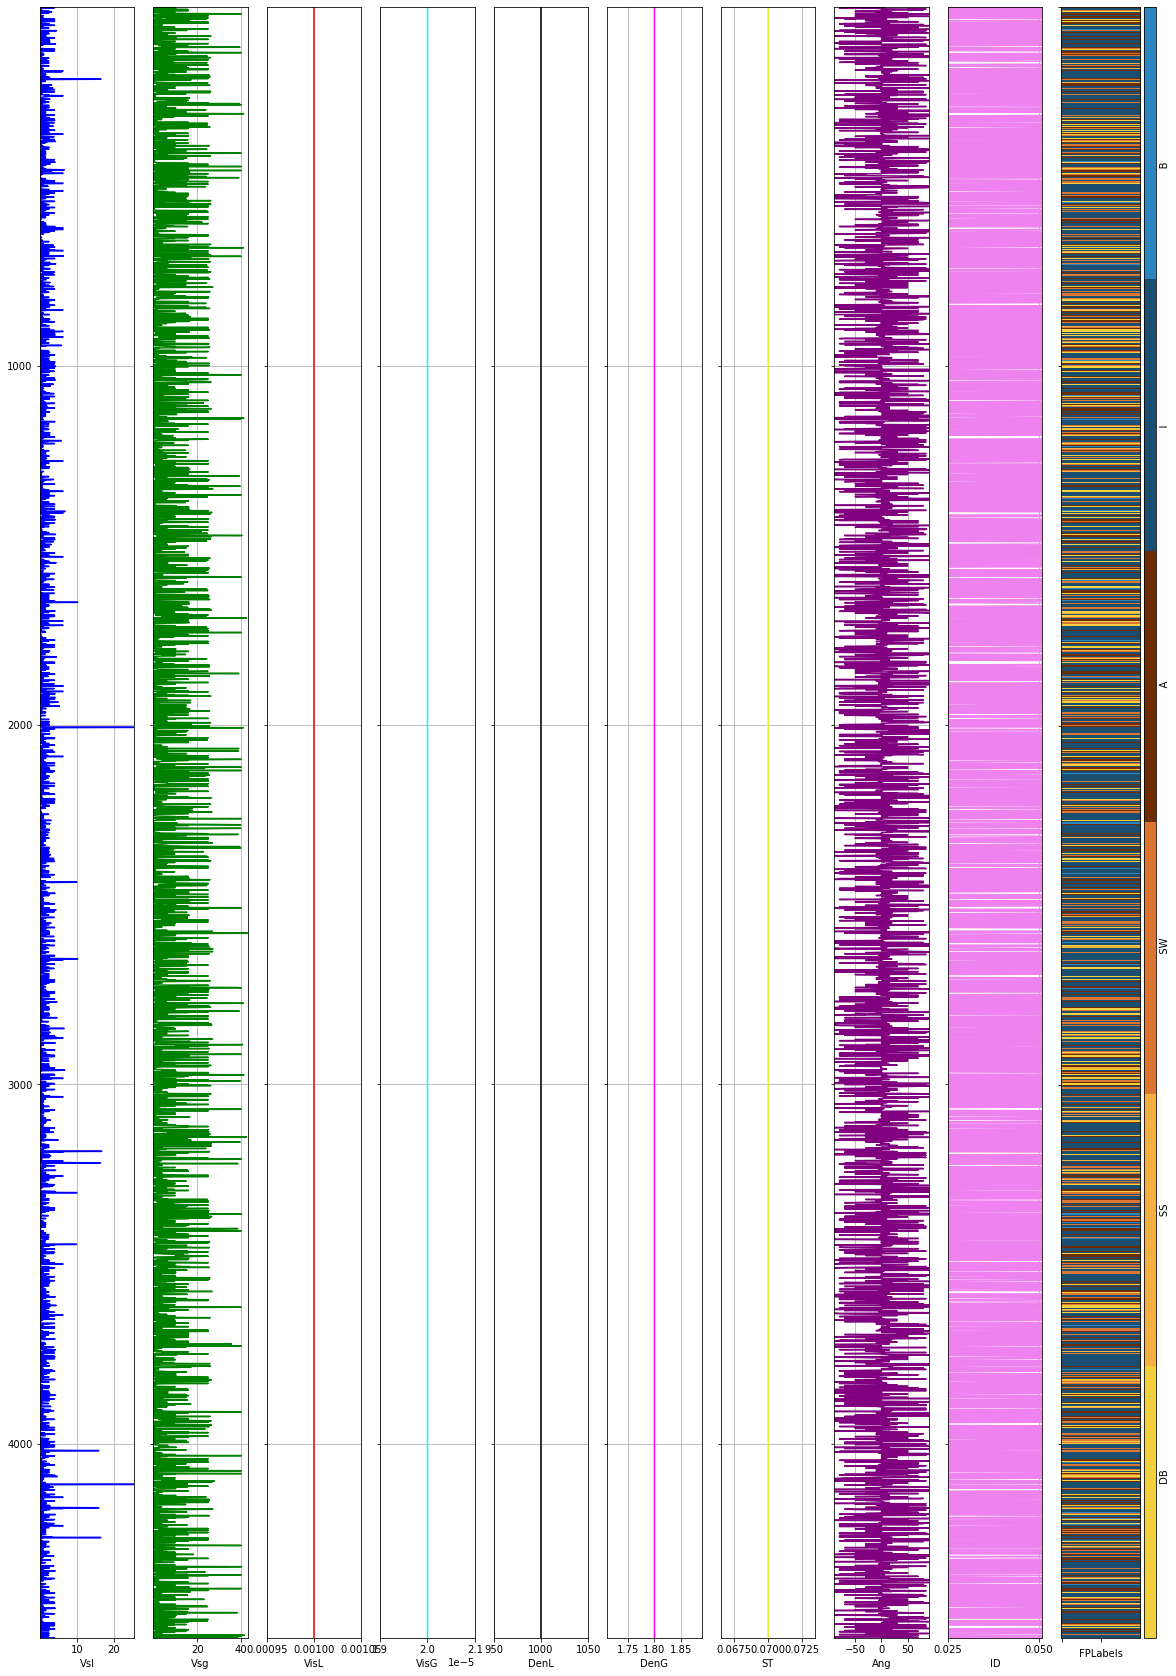

In [4]:
make_flowpatterns_log_plot(training_data,flowpatterns_colors)

DB     492
SS     113
SW     686
A      833
I     2312
B      104
Name: FlowPattern, dtype: int64

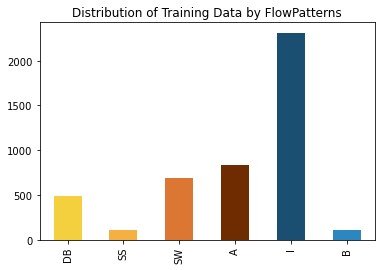

In [5]:
#count the number of unique entries for each flowpatterns, sort them by
#flowpatterns (instead of by number of entries)
flowpatterns_counts = training_data['FlowPattern'].value_counts().sort_index()
#use facies labels to index each count
flowpatterns_counts.index = flowpatterns_labels

flowpatterns_counts.plot(kind='bar',color=flowpatterns_colors,
                         title='Distribution of Training Data by FlowPatterns')
flowpatterns_counts

In [6]:
feature_vectors = training_data.drop(['Samples', 'FlowPattern', 'FPLabels'], axis=1)
feature_vectors.describe()

,Vsl,Vsg,VisL,VisG,DenL,DenG,ST,Ang,ID
count,4540.000000,4540.000000,4.540000e+03,4.540000e+03,4540.0,4.540000e+03,4.540000e+03,4540.000000,4540.000000
mean,0.922429,6.135065,1.000000e-03,2.000000e-05,1000.0,1.800000e+00,7.000000e-02,2.744659,0.038653
std,1.481942,8.671270,3.296338e-17,1.419784e-18,0.0,1.281338e-13,5.399054e-15,46.584475,0.012985
min,0.001100,0.003730,1.000000e-03,2.000000e-05,1000.0,1.800000e+00,7.000000e-02,-90.000000,0.025000
25%,0.016000,0.160000,1.000000e-03,2.000000e-05,1000.0,1.800000e+00,7.000000e-02,-10.000000,0.025000
50%,0.250000,1.600000,1.000000e-03,2.000000e-05,1000.0,1.800000e+00,7.000000e-02,0.500000,0.051000
75%,1.500000,10.000000,1.000000e-03,2.000000e-05,1000.0,1.800000e+00,7.000000e-02,20.000000,0.051000
max,25.517000,42.956200,1.000000e-03,2.000000e-05,1000.0,1.800000e+00,7.000000e-02,90.000000,0.051000


In [7]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(feature_vectors)
scaled_features = scaler.transform(feature_vectors)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
        scaled_features, correct_FlowPattern_labels, test_size=0.2, random_state=42)

In [8]:
from sklearn import svm

clf = svm.SVC()

clf.fit(X_train,y_train)

predicted_labels = clf.predict(X_test)

from sklearn.metrics import confusion_matrix

def print_cm(cm, labels, hide_zeroes=False, hide_diagonal=False, hide_threshold=None):
    """pretty print for confusion matrixes"""
    columnwidth = max([len(x) for x in labels]+[5]) # 5 is value length
    empty_cell = " " * columnwidth
    # Print header
    print ("    " + empty_cell,)
    for label in labels:
        print ("%{0}s".format(columnwidth) % label,)
    print
    # Print rows
    for i, label1 in enumerate(labels):
        print ("    %{0}s".format(columnwidth) % label1,)
        for j in range(len(labels)):
            cell = "%{0}.1f".format(columnwidth) % cm[i, j]
            if hide_zeroes:
                cell = cell if float(cm[i, j]) != 0 else empty_cell
            if hide_diagonal:
                cell = cell if i != j else empty_cell
            if hide_threshold:
                cell = cell if cm[i, j] > hide_threshold else empty_cell
            print (cell,)
        print

conf = confusion_matrix(y_test, predicted_labels)

In [9]:
def accuracy(conf):
    total_correct = 0.
    nb_classes = conf.shape[0]
    for i in np.arange(0,nb_classes):
        total_correct += conf[i][i]
    acc = total_correct/sum(sum(conf))
    return acc

print('FP classification accuracy = %f' % accuracy(conf))

FP classification accuracy = 0.754405


In [10]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
print ('Accuracy:', accuracy_score(y_test, predicted_labels))
print ('F1 score:', f1_score(y_test, predicted_labels,average='weighted'))
print ('Recall:', recall_score(y_test, predicted_labels,
                              average='weighted'))
print ('Precision:', precision_score(y_test, predicted_labels,
                                    average='weighted'))
print ('\n clasification report:\n', classification_report(y_test, predicted_labels))
print ('\n confussion matrix:\n',confusion_matrix(y_test, predicted_labels))

Accuracy: 0.7544052863436124
F1 score: 0.7276667462302979
Recall: 0.7544052863436124
Precision: 0.7234098416324323

 clasification report:
               precision    recall  f1-score   support

           1       0.86      0.77      0.82        97
           2       0.00      0.00      0.00        32
           3       0.69      0.37      0.48       142
           4       0.78      0.91      0.84       172
           5       0.75      0.88      0.81       452
           7       0.36      0.31      0.33        13

    accuracy                           0.75       908
   macro avg       0.57      0.54      0.55       908
weighted avg       0.72      0.75      0.73       908


 confussion matrix:
 [[ 75   0   0   0  22   0]
 [  0   0   0   0  32   0]
 [  0   0  53  29  60   0]
 [  0   0   3 157  12   0]
 [ 12   0  21  16 396   7]
 [  0   0   0   0   9   4]]


/Users/pabloguillen/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pabloguillen/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pabloguillen/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pabl

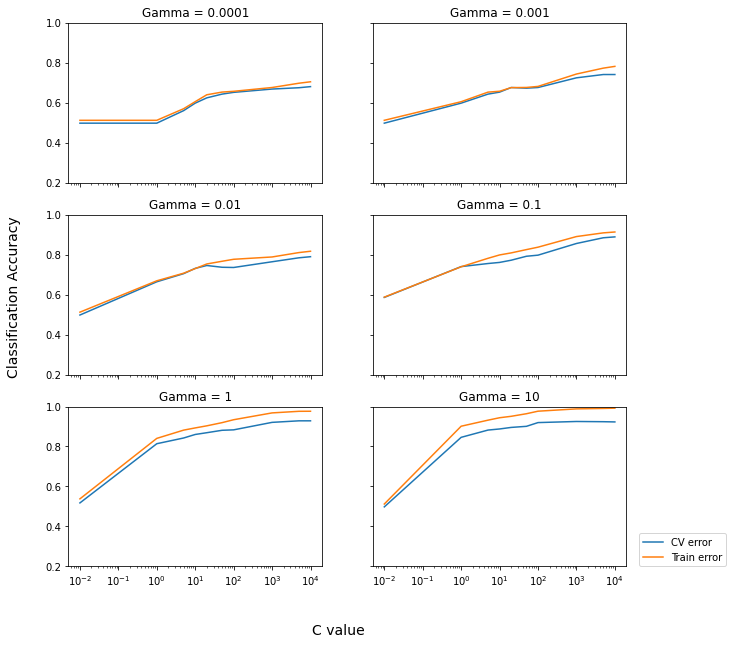

In [11]:
do_model_selection = True

if do_model_selection:
    C_range = np.array([.01, 1, 5, 10, 20, 50, 100, 1000, 5000, 10000])
    gamma_range = np.array([0.0001, 0.001, 0.01, 0.1, 1, 10])
    
    fig, axes = plt.subplots(3, 2,
                             sharex='col', sharey='row',figsize=(10,10))
    plot_number = 0

    for outer_ind, gamma_value in enumerate(gamma_range):
        row = int(plot_number / 2)
        column = int(plot_number % 2)
        cv_errors = np.zeros(C_range.shape)
        train_errors = np.zeros(C_range.shape)
        for index, c_value in enumerate(C_range):

            clf = svm.SVC(C=c_value, gamma=gamma_value)
            clf.fit(X_train,y_train)

            train_conf = confusion_matrix(y_train, clf.predict(X_train))
            cv_conf = confusion_matrix(y_test, clf.predict(X_test))
            
            cv_errors[index] = accuracy(cv_conf)
            train_errors[index] = accuracy(train_conf)
        
        ax = axes[row, column]
        ax.set_title('Gamma = %g'%gamma_value)
        ax.semilogx(C_range, cv_errors, label='CV error')
        ax.semilogx(C_range, train_errors, label='Train error')
        plot_number += 1
        ax.set_ylim([0.2,1])

    ax.legend(bbox_to_anchor=(1.05, 0), loc='lower left', borderaxespad=0.)
    fig.text(0.5, 0.03, 'C value', ha='center',
             fontsize=14)
        
    fig.text(0.04, 0.5, 'Classification Accuracy', va='center',
                      rotation='vertical', fontsize=14)

In [12]:
clf = svm.SVC(C=1000, gamma=10)
clf.fit(X_train, y_train)

cv_conf = confusion_matrix(y_test, clf.predict(X_test))

print('Optimized Flow Pattern classification accuracy = %.2f' % accuracy(cv_conf))

Optimized Flow Pattern classification accuracy = 0.93


In [13]:
predicted_labels_rbf = clf.predict(X_test)

conf_rbf = confusion_matrix(y_test, predicted_labels_rbf)

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
print ('Accuracy:', accuracy_score(y_test, predicted_labels_rbf))
print ('F1 score:', f1_score(y_test, predicted_labels_rbf,average='weighted'))
print ('Recall:', recall_score(y_test, predicted_labels_rbf,
                              average='weighted'))
print ('Precision:', precision_score(y_test, predicted_labels_rbf,
                                    average='weighted'))
print ('\n clasification report:\n', classification_report(y_test, predicted_labels_rbf))
print ('\n confussion matrix:\n',confusion_matrix(y_test, predicted_labels_rbf))

Accuracy: 0.9251101321585903
F1 score: 0.9250821719372038
Recall: 0.9251101321585903
Precision: 0.9253063926842467

 clasification report:
               precision    recall  f1-score   support

           1       0.87      0.86      0.86        97
           2       0.91      0.97      0.94        32
           3       0.92      0.90      0.91       142
           4       0.93      0.94      0.93       172
           5       0.94      0.94      0.94       452
           7       0.80      0.92      0.86        13

    accuracy                           0.93       908
   macro avg       0.90      0.92      0.91       908
weighted avg       0.93      0.93      0.93       908


 confussion matrix:
 [[ 83   0   0   0  14   0]
 [  0  31   1   0   0   0]
 [  2   2 128   5   5   0]
 [  0   0   5 161   6   0]
 [ 10   1   5   8 425   3]
 [  0   0   0   0   1  12]]


In [14]:
filename = 'BD6FPdatatest.csv'
blind_data = pd.read_csv(filename)
blind_data

,Samples,FlowPattern,Vsl,Vsg,VisL,VisG,DenL,DenG,ST,Ang,ID,FPLabels
0,1,5,1.00000,10.00000,0.001,0.00002,1000,1.8,0.07,-5.0,0.051,I
1,2,3,0.06300,10.00000,0.001,0.00002,1000,1.8,0.07,-1.0,0.051,SW
2,3,5,0.03871,0.02371,0.001,0.00002,1000,1.8,0.07,-50.0,0.051,I
3,4,5,0.60856,10.26450,0.001,0.00002,1000,1.8,0.07,90.0,0.051,I
4,5,3,0.65654,1.04475,0.001,0.00002,1000,1.8,0.07,-70.0,0.025,SW
...,...,...,...,...,...,...,...,...,...,...,...,...
1130,1131,5,0.09856,6.34675,0.001,0.00002,1000,1.8,0.07,50.0,0.025,I
1131,1132,2,0.16000,0.40000,0.001,0.00002,1000,1.8,0.07,0.0,0.051,SS
1132,1133,4,0.06713,26.00390,0.001,0.00002,1000,1.8,0.07,-80.0,0.025,A
1133,1134,3,1.03285,0.01526,0.001,0.00002,1000,1.8,0.07,-30.0,0.025,SW


/var/folders/5_/5j22rwyx5cv_vxffrftbgnzh0000gn/T/ipykernel_1523/147862031.py:42: UserWarning: Attempting to set identical left == right == 0.001 results in singular transformations; automatically expanding.
  ax[2].set_xlim(logs.VisL.min(),logs.VisL.max())
/var/folders/5_/5j22rwyx5cv_vxffrftbgnzh0000gn/T/ipykernel_1523/147862031.py:44: UserWarning: Attempting to set identical left == right == 2e-05 results in singular transformations; automatically expanding.
  ax[3].set_xlim(logs.VisG.min(),logs.VisG.max())
/var/folders/5_/5j22rwyx5cv_vxffrftbgnzh0000gn/T/ipykernel_1523/147862031.py:46: UserWarning: Attempting to set identical left == right == 1000 results in singular transformations; automatically expanding.
  ax[4].set_xlim(logs.DenL.min(),logs.DenL.max())
/var/folders/5_/5j22rwyx5cv_vxffrftbgnzh0000gn/T/ipykernel_1523/147862031.py:48: UserWarning: Attempting to set identical left == right == 1.8 results in singular transformations; automatically expanding.
  ax[5].set_xlim(logs.Den

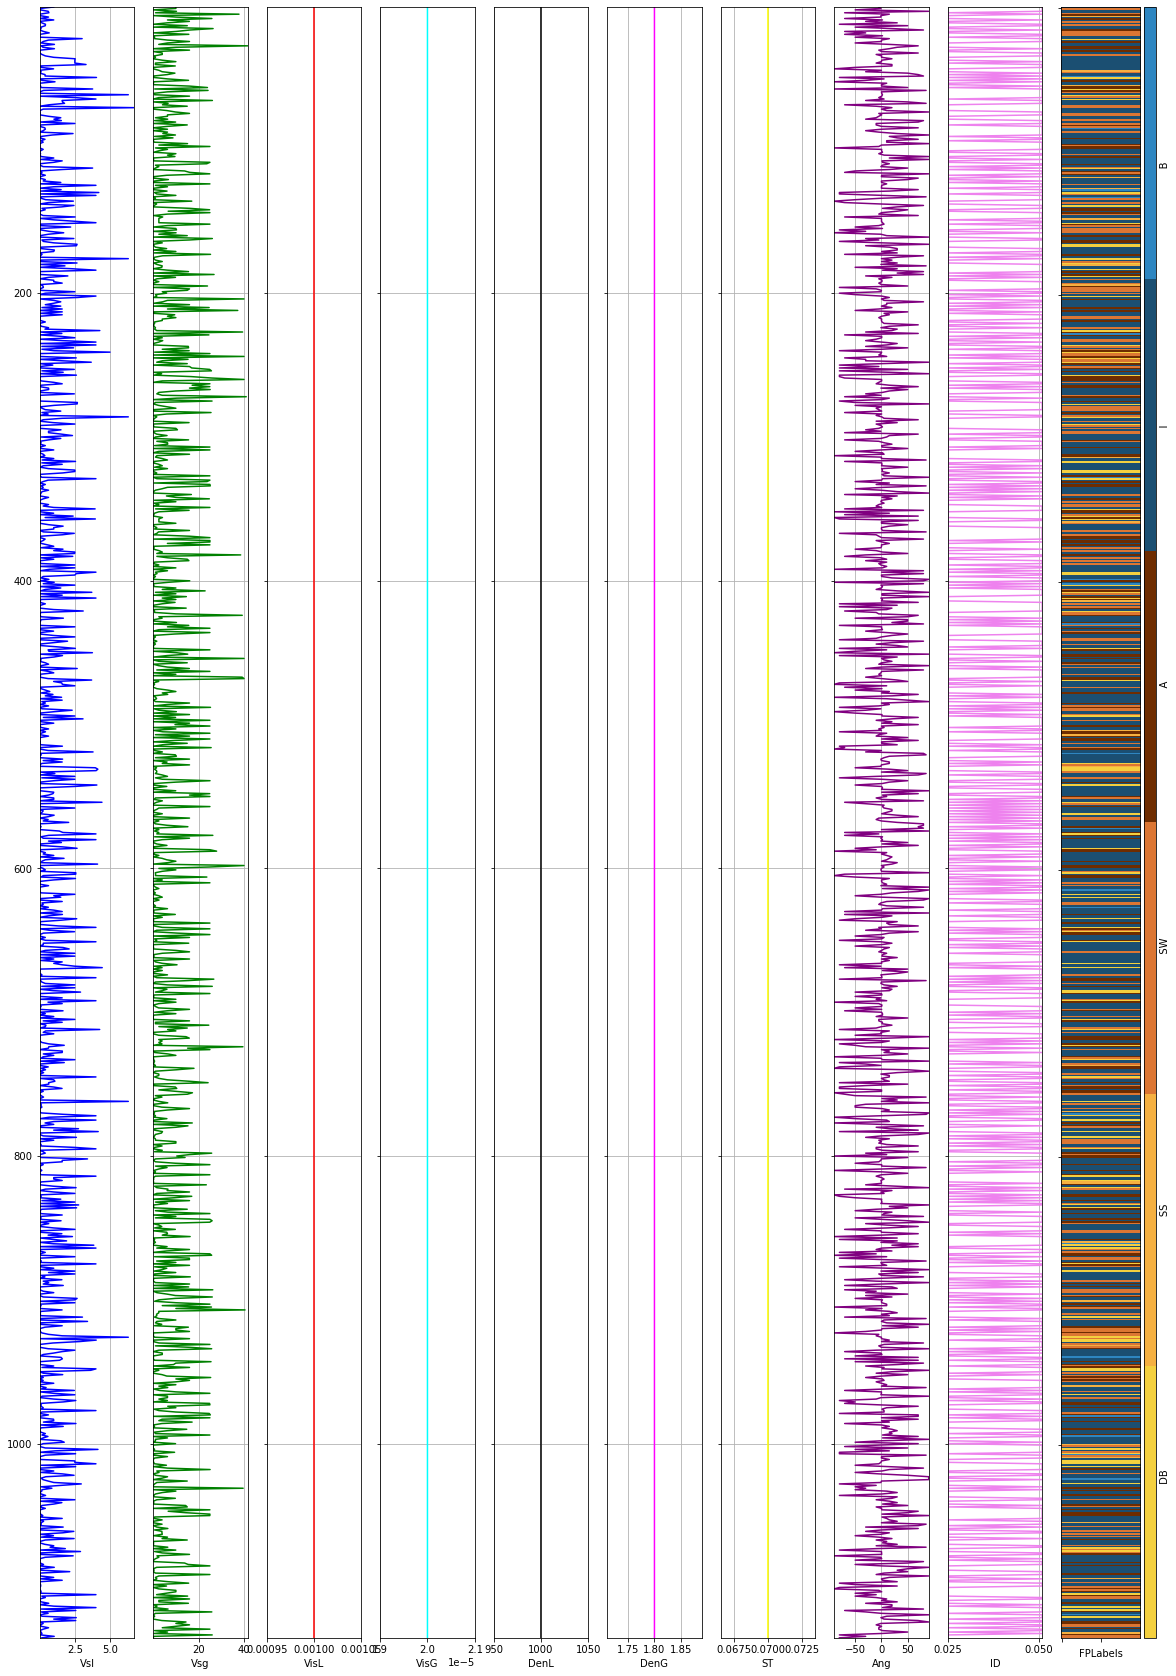

In [15]:
make_flowpatterns_log_plot(blind_data,flowpatterns_colors)

,Vsl,Vsg,VisL,VisG,DenL,DenG,ST,Ang,ID
count,1135.000000,1135.000000,1.135000e+03,1.135000e+03,1135.0,1.135000e+03,1.135000e+03,1135.000000,1135.000000
mean,0.809017,6.572802,1.000000e-03,2.000000e-05,1000.0,1.800000e+00,7.000000e-02,2.658370,0.038676
std,1.166978,8.807383,1.258229e-17,5.186127e-19,0.0,3.221066e-14,1.124596e-15,44.663559,0.012988
min,0.001500,0.003720,1.000000e-03,2.000000e-05,1000.0,1.800000e+00,7.000000e-02,-90.000000,0.025000
25%,0.015000,0.245695,1.000000e-03,2.000000e-05,1000.0,1.800000e+00,7.000000e-02,-10.000000,0.025000
50%,0.165670,2.500000,1.000000e-03,2.000000e-05,1000.0,1.800000e+00,7.000000e-02,0.500000,0.051000
75%,1.046735,10.000000,1.000000e-03,2.000000e-05,1000.0,1.800000e+00,7.000000e-02,20.000000,0.051000
max,6.724140,41.668900,1.000000e-03,2.000000e-05,1000.0,1.800000e+00,7.000000e-02,90.000000,0.051000


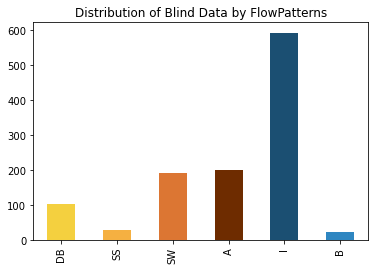

In [16]:
#count the number of unique entries for each flowpatterns, sort them by
#flowpatterns (instead of by number of entries)
flowpatterns_counts = blind_data['FlowPattern'].value_counts().sort_index()
#use facies labels to index each count
flowpatterns_counts.index = flowpatterns_labels

flowpatterns_counts.plot(kind='bar',color=flowpatterns_colors,
                         title='Distribution of Blind Data by FlowPatterns')
flowpatterns_counts

feature_vectors_bd = blind_data.drop(['Samples', 'FlowPattern', 'FPLabels'], axis=1)
feature_vectors_bd.describe()

In [17]:
X_blind = scaler.transform(feature_vectors_bd)

In [18]:
y_blind = blind_data['FlowPattern'].values

In [19]:
y_pred = clf.predict(X_blind)

In [20]:
blind_data['Prediction'] = y_pred

In [21]:
predbd_conf = confusion_matrix(y_blind, y_pred)

print('Optimized Flow Pattern classification accuracy = %.2f' % accuracy(predbd_conf))

Optimized Flow Pattern classification accuracy = 0.92


In [22]:
def compare_flowpatterns_plot(logs, compare, flowpatterns_colors):
    #make sure logs are sorted by samples
    logs = logs.sort_values(by='Samples')
    cmap_flowpatterns = colors.ListedColormap(
            flowpatterns_colors[0:len(flowpatterns_colors)], 'indexed')
        
    ztop=logs.Samples.min(); zbot=logs.Samples.max()
                                              
    cluster1 = np.repeat(np.expand_dims(logs['FlowPattern'].values,1), 100, 1)
    cluster2 = np.repeat(np.expand_dims(logs[compare].values,1), 100, 1)
                                             
    f, ax = plt.subplots(nrows=1, ncols=11, figsize=(20, 30))
    ax[0].plot(logs.Vsl, logs.Samples, '-', color='blue')
    ax[1].plot(logs.Vsg, logs.Samples, '-', color='green')
    ax[2].plot(logs.VisL, logs.Samples, '-', color='red')
    ax[3].plot(logs.VisG, logs.Samples, '-', color='cyan')
    ax[4].plot(logs.DenL, logs.Samples, '-', color='black')
    ax[5].plot(logs.DenG, logs.Samples, '-', color='magenta')
    ax[6].plot(logs.ST, logs.Samples, '-', color='yellow')
    ax[7].plot(logs.Ang, logs.Samples, '-', color='purple')
    ax[8].plot(logs.ID, logs.Samples, '-', color='violet')
                                             
    im1 = ax[9].imshow(cluster1, interpolation='none', aspect='auto',
                    cmap=cmap_flowpatterns,vmin=1,vmax=7)
                                             
    im2 = ax[10].imshow(cluster2, interpolation='none', aspect='auto',
                    cmap=cmap_flowpatterns,vmin=1,vmax=7)
                                              
    divider = make_axes_locatable(ax[10])
    cax = divider.append_axes("right", size="15%", pad=0.05)
    cbar=plt.colorbar(im2, cax=cax)
    cbar.set_label((80*' ').join([' DB ', 'SS', 'SW',
                                    'A', ' I ', ' B ']))
    cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')
                                              
    for i in range(len(ax)-2):
        ax[i].set_ylim(ztop,zbot)
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis='x', nbins=1)
                                              
    ax[0].set_xlabel("Vsl")
    ax[0].set_xlim(logs.Vsl.min(),logs.Vsl.max())
    ax[1].set_xlabel("Vsg")
    ax[1].set_xlim(logs.Vsg.min(),logs.Vsg.max())
    ax[2].set_xlabel("VisL")
    ax[2].set_xlim(logs.VisL.min(),logs.VisL.max())
    ax[3].set_xlabel("VisG")
    ax[3].set_xlim(logs.VisG.min(),logs.VisG.max())
    ax[4].set_xlabel("DenL")
    ax[4].set_xlim(logs.DenL.min(),logs.DenL.max())
    ax[5].set_xlabel("DenG")
    ax[5].set_xlim(logs.DenG.min(),logs.DenG.max())
    ax[6].set_xlabel("ST")
    ax[6].set_xlim(logs.ST.min(),logs.ST.max())
    ax[7].set_xlabel("Ang")
    ax[7].set_xlim(logs.Ang.min(),logs.Ang.max())
    ax[8].set_xlabel("ID")
    ax[8].set_xlim(logs.ID.min(),logs.ID.max())
    ax[9].set_xlabel('FPLabels')
    ax[10].set_xlabel(compare)
    
    ax[1].set_yticklabels([]); ax[2].set_yticklabels([]); ax[3].set_yticklabels([])
    ax[4].set_yticklabels([]); ax[5].set_yticklabels([]); ax[6].set_yticklabels([])
    ax[7].set_yticklabels([]); ax[8].set_yticklabels([]); ax[9].set_yticklabels([])
    ax[9].set_xticklabels([])
    ax[10].set_xticklabels([])

/var/folders/5_/5j22rwyx5cv_vxffrftbgnzh0000gn/T/ipykernel_1523/4242777890.py:47: UserWarning: Attempting to set identical left == right == 0.001 results in singular transformations; automatically expanding.
  ax[2].set_xlim(logs.VisL.min(),logs.VisL.max())
/var/folders/5_/5j22rwyx5cv_vxffrftbgnzh0000gn/T/ipykernel_1523/4242777890.py:49: UserWarning: Attempting to set identical left == right == 2e-05 results in singular transformations; automatically expanding.
  ax[3].set_xlim(logs.VisG.min(),logs.VisG.max())
/var/folders/5_/5j22rwyx5cv_vxffrftbgnzh0000gn/T/ipykernel_1523/4242777890.py:51: UserWarning: Attempting to set identical left == right == 1000 results in singular transformations; automatically expanding.
  ax[4].set_xlim(logs.DenL.min(),logs.DenL.max())
/var/folders/5_/5j22rwyx5cv_vxffrftbgnzh0000gn/T/ipykernel_1523/4242777890.py:53: UserWarning: Attempting to set identical left == right == 1.8 results in singular transformations; automatically expanding.
  ax[5].set_xlim(logs

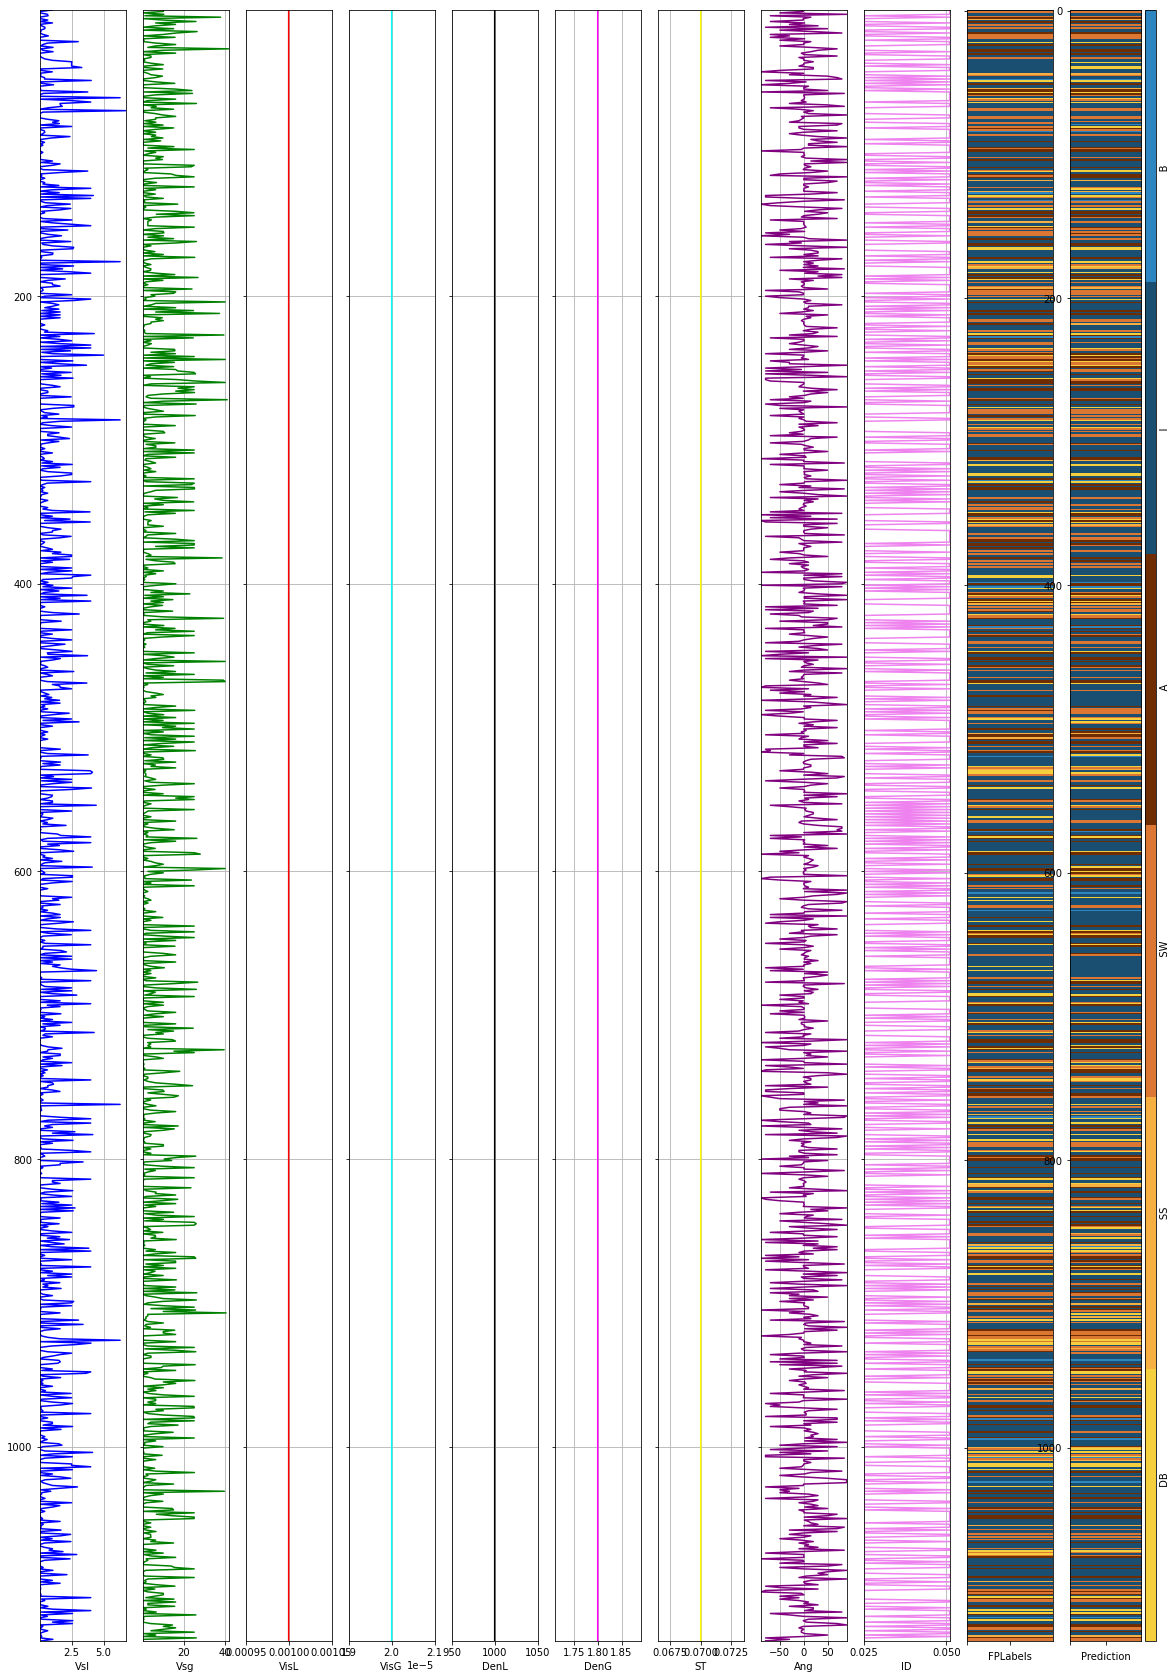

In [23]:
compare_flowpatterns_plot(blind_data, 'Prediction', flowpatterns_colors)